In [42]:
# To ignore the warnings
import warnings
warnings.filterwarnings("ignore")

# Import the libraries to handle the np array, pandas dataframe, and visualiztion
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import prepare.py to prepare the dataset
import prepare, explore

import psutil
from tqdm import tqdm

### Acquire the data

In [2]:
# Acquire the train, validate and test from csv files with 2000 user

df_train = pd.read_csv('data_2000users/train.csv')
df_validate = pd.read_csv('data_2000users/validate.csv')
df_test = pd.read_csv('data_2000users/test.csv')
df_ques = pd.read_csv('questions_with_tag_counts.csv', index_col=0)

# Print the shape of the datasets
df_train.shape, df_validate.shape, df_test.shape, df_ques.shape

((411517, 18), (50842, 18), (52868, 18), (13523, 6))

In [3]:
%%time
# Compute the time to process the cell

# Test the fucntion to complete all the steps above
train, validate, test, train_s, validate_s, test_s = prepare.prep_riiid(df_train, df_validate, df_test)

# Print the shapes of train, validate, and test
train.shape, validate.shape, test.shape

CPU times: user 9.89 s, sys: 777 ms, total: 10.7 s
Wall time: 10.7 s


((403377, 21), (49945, 20), (51971, 20))

In [4]:
# Inpsect the train
train.head()

,timestamp,user_id,content_id,task_container_id,answered_correctly,question_had_explanation,user_acc_mean,user_lectures_running_total,q_time,avg_user_q_time,...,bundle_id,part,tags,tag_count,mean_bundle_accuracy,mean_part_accuracy,mean_content_accuracy,mean_task_accuracy,mean_tagcount_accuracy,mean_tags_accuracy
0,0,1864702,5720,0,1,False,0.630049,0,45951.0,11917302.0,...,5720,5,115,1,0.82,0.61,0.82,0.68,0.62,0.79
1,45951,1864702,5204,1,0,False,0.630049,0,28391.0,11917302.0,...,5204,5,173,1,0.55,0.61,0.55,0.53,0.62,0.65
2,74342,1864702,4094,2,1,False,0.630049,0,22436.0,11917302.0,...,4094,5,1,1,0.44,0.61,0.44,0.45,0.62,0.60
3,96778,1864702,9699,3,1,False,0.630049,0,36191.0,11917302.0,...,9699,5,55,1,0.41,0.61,0.41,0.54,0.62,0.62
4,132969,1864702,5889,4,0,False,0.630049,0,24322.0,11917302.0,...,5889,5,89,1,0.69,0.61,0.69,0.49,0.62,0.62


In [5]:
# Quick summary of train
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403377 entries, 0 to 403376
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   timestamp                    403377 non-null  int64  
 1   user_id                      403377 non-null  int64  
 2   content_id                   403377 non-null  int64  
 3   task_container_id            403377 non-null  int64  
 4   answered_correctly           403377 non-null  int64  
 5   question_had_explanation     403376 non-null  object 
 6   user_acc_mean                403377 non-null  float64
 7   user_lectures_running_total  403377 non-null  int64  
 8   q_time                       403377 non-null  float64
 9   avg_user_q_time              403377 non-null  float64
 10  question_id                  403377 non-null  int64  
 11  bundle_id                    403377 non-null  int64  
 12  part                         403377 non-null  int64  
 13 

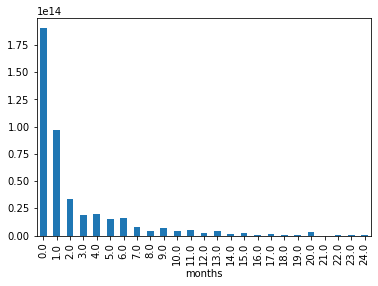

In [29]:
df = explore.feature_over_time('user_id', train, 'sum')
df.groupby('months').user_id.sum().plot(kind='bar')
plt.show()

### subtract the users that use the apps for longer than 1 year

In [32]:
user_ids = train.user_id.unique()
user_ids

array([   1864702,    1960671,    3556553, ..., 1701129060, 1956774028,
       2145492661])

In [46]:
max(train.timestamp) > 31536000000

True

In [132]:
%%time

one_year_users = pd.DataFrame(columns = train.columns)

for user in tqdm(user_ids):
    mask = (train.user_id == user)
    df = train[mask]
    if max(df.timestamp) > 31536000000:
        one_year_users = one_year_users.append(df)
    else:
        continue
        
one_year_users.shape


100%|██████████| 2000/2000 [00:02<00:00, 910.00it/s]

CPU times: user 3.01 s, sys: 409 ms, total: 3.42 s
Wall time: 2.2 s


(31848, 21)

In [133]:
# How many students use the apps over 1 year?
one_year_users.user_id.unique()

array([21063761, 279669912, 317212349, 345780563, 367462853, 441499543,
       551516464, 553541941, 570790419, 667485142, 781118312, 826778211,
       830595699, 861083351, 870781172, 922820858, 958735286, 988375485,
       1012029730, 1061991533, 1069796608, 1148936784, 1160059620,
       1213440001, 1413058943, 1442485436, 1472234878, 1533584643,
       1685245219, 1698919904, 1818053521, 1956346780, 2002876798,
       2036479106, 1040963081], dtype=object)

In [134]:
# Who has the largest rows
one_year_users.groupby('user_id').user_id.count().sort_values(ascending=False).head()

user_id
1818053521    5371
861083351     3706
1413058943    3262
667485142     3060
21063761      2559
Name: user_id, dtype: int64

In [53]:
one_year_users.head()

,timestamp,user_id,content_id,task_container_id,answered_correctly,question_had_explanation,user_acc_mean,user_lectures_running_total,q_time,avg_user_q_time,...,bundle_id,part,tags,tag_count,mean_bundle_accuracy,mean_part_accuracy,mean_content_accuracy,mean_task_accuracy,mean_tagcount_accuracy,mean_tags_accuracy
1375,370801,21063761,4492,8,1,False,0.705364,0,40415.0,12374745.0,...,4492,5,80,1,0.44,0.61,0.44,0.51,0.62,0.55
1376,411216,21063761,4120,9,1,False,0.705364,0,34878.0,12374745.0,...,4120,5,123,1,0.27,0.61,0.27,0.46,0.62,0.51
1377,446094,21063761,4696,10,1,False,0.705364,0,19551.0,12374745.0,...,4696,5,133,1,0.55,0.61,0.55,0.55,0.62,0.61
1378,465645,21063761,6116,11,0,False,0.705364,0,84689.0,12374745.0,...,6116,5,23,1,0.30,0.61,0.30,0.46,0.62,0.40
1379,550334,21063761,6173,12,1,False,0.705364,0,75423.0,12374745.0,...,6173,5,151,1,0.32,0.61,0.32,0.49,0.62,0.49


In [135]:
mask = (one_year_users.user_id == 861083351 )
student = one_year_users[mask]
# student = student.set_index('timestamp')
student.head()

,timestamp,user_id,content_id,task_container_id,answered_correctly,question_had_explanation,user_acc_mean,user_lectures_running_total,q_time,avg_user_q_time,...,bundle_id,part,tags,tag_count,mean_bundle_accuracy,mean_part_accuracy,mean_content_accuracy,mean_task_accuracy,mean_tagcount_accuracy,mean_tags_accuracy
68239,437923,861083351,4492,8,1,False,0.701624,0,24480.0,15197743.0,...,4492,5,80,1,0.44,0.61,0.44,0.51,0.62,0.55
68240,462403,861083351,4120,9,1,False,0.701624,0,26818.0,15197743.0,...,4120,5,123,1,0.27,0.61,0.27,0.46,0.62,0.51
68241,489221,861083351,4696,10,0,False,0.701624,0,15854.0,15197743.0,...,4696,5,133,1,0.55,0.61,0.55,0.55,0.62,0.61
68242,505075,861083351,6116,11,0,False,0.701624,0,19970.0,15197743.0,...,6116,5,23,1,0.30,0.61,0.30,0.46,0.62,0.40
68243,525045,861083351,6173,12,1,False,0.701624,0,18360.0,15197743.0,...,6173,5,151,1,0.32,0.61,0.32,0.49,0.62,0.49


In [137]:
part = student.groupby('part').answered_correctly.agg(['count', 'sum'])
part['accuracy'] = part['sum']/part['count']
part.sort_values('accuracy')

,count,sum,accuracy
part,,,
5,1647,1099,0.667274
6,910,660,0.725275
4,212,158,0.745283
3,424,340,0.801887
7,204,166,0.813725
2,210,177,0.842857
1,99,87,0.878788


In [144]:
content = student.groupby('tags').answered_correctly.agg(['count', 'sum'])
content['accuracy'] = content['sum']/content['count']
content.sort_values(['count','accuracy'])

,count,sum,accuracy
tags,,,
100 148 38 102,1,0,0.000000
106 12 29,1,0,0.000000
106 126 162 92,1,0,0.000000
106 183 162 29,1,0,0.000000
106 81 29,1,0,0.000000
...,...,...,...
96,94,61,0.648936
1,139,91,0.654676
53,159,114,0.716981


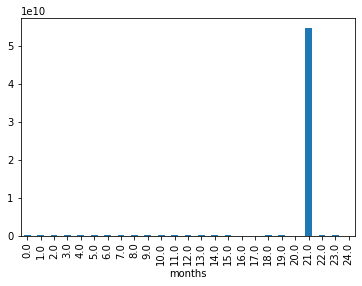

In [57]:
df = explore.feature_over_time('user_acc_mean', one_year_users, 'mean')
df.groupby('months').q_time.mean().plot(kind='bar')
plt.show()